In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

# Configurando estilo de visualização
plt.style.use('seaborn-v0_8')
%matplotlib inline

In [4]:
# --- DEMONSTRAÇÃO K-MEANS: SEGMENTAÇÃO DE CLIENTES ---

# Gerando dados sintéticos para clientes
np.random.seed(42)
n_samples = 1000
data = {
    'idade': np.random.normal(40, 15, n_samples),
    'renda_anual': np.random.normal(50000, 20000, n_samples),
    'gastos_mensais': np.random.normal(2000, 800, n_samples)
}
df = pd.DataFrame(data)

# Normalizando os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

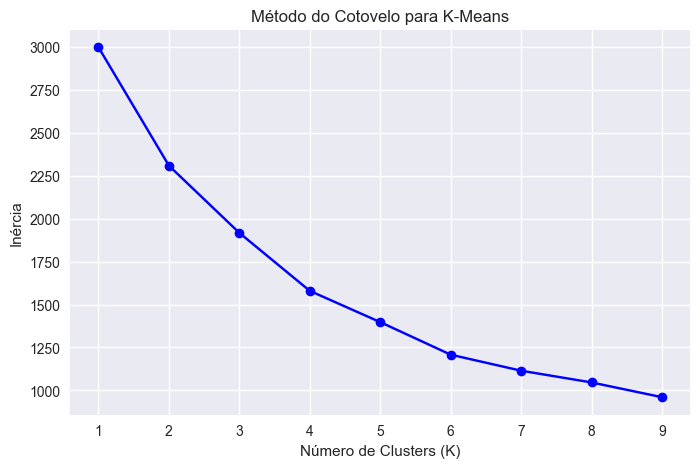

In [14]:
# Método do cotovelo para encontrar o número ideal de clusters
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotando o método do cotovelo
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo para K-Means')
plt.savefig('kmeans_cotovelo.png')
plt.show()

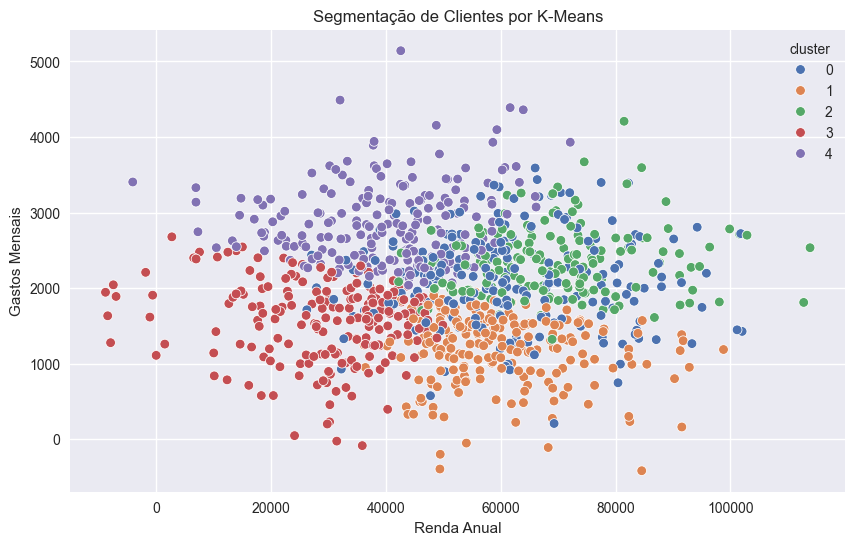

In [12]:

# Aplicando K-Means com K=5
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Visualizando os clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='renda_anual', y='gastos_mensais', hue='cluster', palette='deep')
plt.title('Segmentação de Clientes por K-Means')
plt.xlabel('Renda Anual')
plt.ylabel('Gastos Mensais')
plt.savefig('kmeans_segmentacao_clientes.png')
plt.show()

In [7]:
# --- DEMONSTRAÇÃO KNN: PREVISÃO DE AÇÕES ---

# Gerando dados sintéticos para previsão de ações
np.random.seed(42)
n_samples = 1000
stock_data = {
    'preco_anterior': np.random.normal(100, 10, n_samples),
    'volume': np.random.normal(10000, 2000, n_samples),
    'volatilidade': np.random.normal(0.02, 0.005, n_samples),
    'movimento': np.random.choice([0, 1], n_samples)  # 0: queda, 1: alta
}
df_stock = pd.DataFrame(stock_data)

In [11]:
df_stock.head()

,preco_anterior,volume,volatilidade,movimento
0,104.967142,12798.710873,0.016624,1
1,98.617357,11849.267366,0.019277,1
2,106.476885,10119.260740,0.016038,1
3,115.230299,8706.126445,0.018460,1
4,97.658466,11396.446627,0.010532,0


In [9]:

# Separando features e target
X = df_stock[['preco_anterior', 'volume', 'volatilidade']]
y = df_stock['movimento']

# Normalizando os dados
X_scaled = scaler.fit_transform(X)

# Dividindo em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Aplicando KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Fazendo previsões
y_pred = knn.predict(X_test)

# Avaliando o modelo
print("\nRelatório de Classificação para KNN:")
print(classification_report(y_test, y_pred))


Relatório de Classificação para KNN:
              precision    recall  f1-score   support

           0       0.47      0.56      0.51       136
           1       0.56      0.47      0.51       164

    accuracy                           0.51       300
   macro avg       0.51      0.51      0.51       300
weighted avg       0.52      0.51      0.51       300



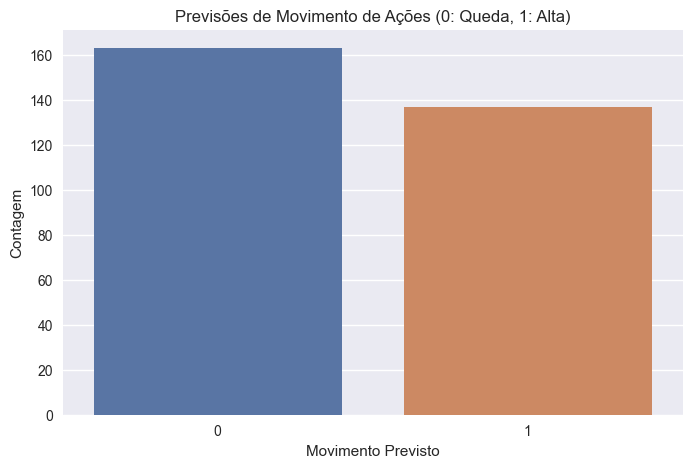

In [13]:
# Visualizando a distribuição das previsões
plt.figure(figsize=(8, 5))
sns.countplot(x=y_pred, palette='deep')
plt.title('Previsões de Movimento de Ações (0: Queda, 1: Alta)')
plt.xlabel('Movimento Previsto')
plt.ylabel('Contagem')
plt.savefig('knn_previsao_acoes.png')
plt.show()